In [1]:
import numpy as np
import math
import xmltodict

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xarray as xr

In [4]:
labels = '../data/chennai_label.xml'
with open(labels, 'r') as file:
    xml = file.read()

In [5]:
xml_dict = xmltodict.parse(xml)

In [8]:
class_dict = {'oil_spill': 0}

In [49]:
img_w = int(xml_dict['annotation']['size']['width'])
img_h = int(xml_dict['annotation']['size']['height'])

labels_yolo = '../data/chennai_label.txt'
coord = list()
with open(labels_yolo, 'w') as file:
    for bb in xml_dict['annotation']['object']:
        class_num = class_dict[bb['name']]
        x = float(bb['robndbox']['cx']) / img_w
        y = float(bb['robndbox']['cy']) / img_h
        width = float(bb['robndbox']['w'])
        height = float(bb['robndbox']['h'])
        angle = float(bb['robndbox']['angle'])
        
        w = (abs(width * math.cos(angle)) + abs(height * math.sin(angle)))
        h = (abs(width * math.sin(angle)) + abs(height * math.cos(angle)))
        
        w /= img_w
        h /= img_h
        
        coord.append([x, y, w, h])
        line = f'{class_num} {x} {y} {w} {h}\n'
        print(bb)
        print(line)
        file.write(line)

{'type': 'robndbox', 'name': 'oil_spill', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'robndbox': {'cx': '6179.6667', 'cy': '1236.5', 'w': '4260.0', 'h': '1447.0', 'angle': '0.0'}}
0 0.6179666699999999 0.2473 0.426 0.2894

{'type': 'robndbox', 'name': 'oil_spill', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'robndbox': {'cx': '3628.2303', 'cy': '2529.4157', 'w': '1647.7768', 'h': '449.4157', 'angle': '2.851593'}}
0 0.36282303 0.50588314 0.1707483460265801 0.1803669564131929

{'type': 'robndbox', 'name': 'oil_spill', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'robndbox': {'cx': '1737.0', 'cy': '3639.8333', 'w': '671.1156', 'h': '1073.4304', 'angle': '2.541593'}}
0 0.1737 0.72796666 0.11599998268448666 0.2529761459300634

{'type': 'robndbox', 'name': 'oil_spill', 'pose': 'Unspecified', 'truncated': '0', 'difficult': '0', 'robndbox': {'cx': '5793.0', 'cy': '3919.8333', 'w': '700.0', 'h': '667.0', 'angle': '0.0'}}
0 0.5793 0.7839666599999999 0.

In [26]:
y = '../data/chennai_y.nc'
chennai_y = xr.open_dataarray(y)

4049.6666999999998 513.0
2774.488569867099 2078.4983089670177
1157.0000865775667 3007.392935174841
5443.0 3586.3333
5543.0 4573.3333


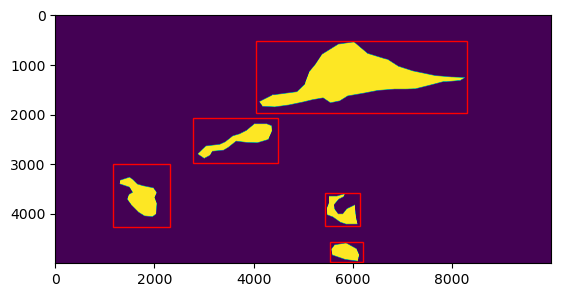

In [47]:
#Plot data
fig, ax = plt.subplots()

# Display the image
ax.imshow(chennai_y)

for c in coord:
    w = c[2] * 10000
    h = c[3] * 5000
    x = (c[0] * 10000) - (w/2)
    y = (c[1] * 5000) - (h/2)

    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()